In [1]:
import torch
import torchvision
from torch import nn
from transformers import AutoTokenizer, CLIPModel, CLIPVisionModelWithProjection
from train_c_controlnet import WurstCore
from train_b import WurstCore as WurstCoreB
from warp_core.utils import load_or_fail
import yaml
import matplotlib.pyplot as plt
from PIL import Image
import requests

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [2]:
# SETUP WARPCORE
# config_file = 'configs/controlnet_c_3b_base.yml'
# config_file = 'configs/controlnet_c_3b_canny.yml'
# config_file = 'configs/controlnet_c_3b_inpainting.yml'
# config_file = 'configs/controlnet_c_3b_qr.yml'
# config_file = 'configs/controlnet_c_3b_sr.yml'
config_file = 'configs/controlnet_c_3b_identity.yml'
with open(config_file, "r", encoding="utf-8") as file:
    loaded_config = yaml.safe_load(file)
    loaded_config['use_fsdp'] = False
    loaded_config['batch_size'] = 4
    
    # Humans 7M
    loaded_config['captions_getter']  = ['combined_txt', 'identity']
    loaded_config['webdataset_path'] = 'pipe:aws s3 cp s3://laion-west/humans-7M-with-blip-caps+aesthetics+nsfw/00000{1..5499}.tar -'

warpcore = WurstCore(
    config_dict=loaded_config,
    device=device
)

# STAGE B
config_file_b = 'configs/finetune_b_3b.yml'
with open(config_file_b, "r", encoding="utf-8") as file:
    config_file_b = yaml.safe_load(file)
    config_file_b['use_fsdp'] = False
    config_file_b['batch_size'] = 4
    
warpcore_b = WurstCoreB(
    config_dict=config_file_b,
    device=device
)

>>> RESUMING TRAINING FROM ITER  1


In [3]:
# SETUP MODELS & DATA
extras = warpcore.setup_extras_pre()
models = warpcore.setup_models(extras)
data = warpcore.setup_data(extras)
models.generator.bfloat16()
print("CONTROLNET READY")

extras_b = warpcore_b.setup_extras_pre()
models_b = warpcore_b.setup_models(extras_b)
models_b.generator.bfloat16()
print("STAGE B READY")
pass

2024-01-21 01:29:34.765501073 [E:onnxruntime:Default, env.cc:254 ThreadMain] pthread_setaffinity_np failed for thread: 3256968, index: 20, mask: {21, 69, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2024-01-21 01:29:34.765506256 [E:onnxruntime:Default, env.cc:254 ThreadMain] pthread_setaffinity_np failed for thread: 3256969, index: 21, mask: {22, 70, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2024-01-21 01:29:34.765597148 [E:onnxruntime:Default, env.cc:254 ThreadMain] pthread_setaffinity_np failed for thread: 3256970, index: 22, mask: {23, 71, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2024-01-21 01:29:34.766673139 [E:onnxruntime:Default, env.cc:254 ThreadMain] pthread_setaffinity_np failed for thread: 3256992, index: 44, mask: {45, 93, }, error code: 22 error msg: Invalid

Applied providers: ['AzureExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'AzureExecutionProvider': {}}
find model: ./modules/cnet_modules/face_id/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0


2024-01-21 01:29:35.831613096 [E:onnxruntime:Default, env.cc:254 ThreadMain] pthread_setaffinity_np failed for thread: 3257109, index: 20, mask: {21, 69, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2024-01-21 01:29:35.831654994 [E:onnxruntime:Default, env.cc:254 ThreadMain] pthread_setaffinity_np failed for thread: 3257110, index: 21, mask: {22, 70, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2024-01-21 01:29:35.831668307 [E:onnxruntime:Default, env.cc:254 ThreadMain] pthread_setaffinity_np failed for thread: 3257111, index: 22, mask: {23, 71, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2024-01-21 01:29:35.832848294 [E:onnxruntime:Default, env.cc:254 ThreadMain] pthread_setaffinity_np failed for thread: 3257133, index: 44, mask: {45, 93, }, error code: 22 error msg: Invalid

Applied providers: ['AzureExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'AzureExecutionProvider': {}}
find model: ./modules/cnet_modules/face_id/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['AzureExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'AzureExecutionProvider': {}}
find model: ./modules/cnet_modules/face_id/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['AzureExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'AzureExecutionProvider': {}}
find model: ./modules/cnet_modules/face_id/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['AzureExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'AzureExecutionProvider': {}}


2024-01-21 01:29:36.027439211 [E:onnxruntime:Default, env.cc:254 ThreadMain] pthread_setaffinity_np failed for thread: 3257251, index: 21, mask: {22, 70, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2024-01-21 01:29:36.027465228 [E:onnxruntime:Default, env.cc:254 ThreadMain] pthread_setaffinity_np failed for thread: 3257252, index: 22, mask: {23, 71, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2024-01-21 01:29:36.028585412 [E:onnxruntime:Default, env.cc:254 ThreadMain] pthread_setaffinity_np failed for thread: 3257274, index: 44, mask: {45, 93, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2024-01-21 01:29:36.028583770 [E:onnxruntime:Default, env.cc:254 ThreadMain] pthread_setaffinity_np failed for thread: 3257275, index: 45, mask: {46, 94, }, error code: 22 error msg: Invalid

find model: ./modules/cnet_modules/face_id/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (320, 320)


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPVisionModelWithProjection: ['text_model.encoder.layers.1.self_attn.v_proj.bias', 'text_model.encoder.layers.11.mlp.fc2.weight', 'text_model.encoder.layers.2.layer_norm1.bias', 'text_model.encoder.layers.3.mlp.fc2.weight', 'text_model.encoder.layers.0.self_attn.q_proj.weight', 'text_model.encoder.layers.3.self_attn.k_proj.weight', 'text_model.encoder.layers.0.self_attn.k_proj.weight', 'text_model.encoder.layers.1.self_attn.out_proj.bias', 'text_model.encoder.layers.5.self_attn.q_proj.bias', 'text_model.encoder.layers.3.self_attn.out_proj.bias', 'text_model.encoder.layers.6.self_attn.q_proj.bias', 'text_model.embeddings.position_embedding.weight', 'text_model.encoder.layers.10.self_attn.v_proj.weight', 'text_model.encoder.layers.1.self_attn.k_proj.bias', 'text_model.encoder.layers.0.layer_norm2.bias', 'text_model.encoder.layers.11.mlp.fc1.bias', 'text_model.encoder.layers.9.mlp.fc1.b

Training with batch size 4 (4/GPU)
CONTROLNET READY


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

STAGE B READY


In [4]:
# LOAD CHECKPOINT
# models.controlnet.load_state_dict(load_or_fail("/weka/home-warp/models/v3_release/stage_c_3b_controlnet_canny/controlnet_2k.safetensors"))
# models.controlnet.load_state_dict(load_or_fail("/weka/home-warp/models/v3_release/stage_c_3b_controlnet_canny/controlnet_10k.safetensors"))
# models.controlnet.load_state_dict(load_or_fail("/weka/home-warp/models/v3_release/stage_c_3b_controlnet_inpainting/controlnet_10k.safetensors"))
# models.controlnet.load_state_dict(load_or_fail("/weka/home-warp/models/v3_release/stage_c_3b_controlnet_sr/controlnet_10k.safetensors"))
# models.controlnet.load_state_dict(load_or_fail("/weka/home-warp/models/v3_release/stage_c_3b_controlnet_identity/controlnet.safetensors"))


torch.Size([4, 3, 768, 768])


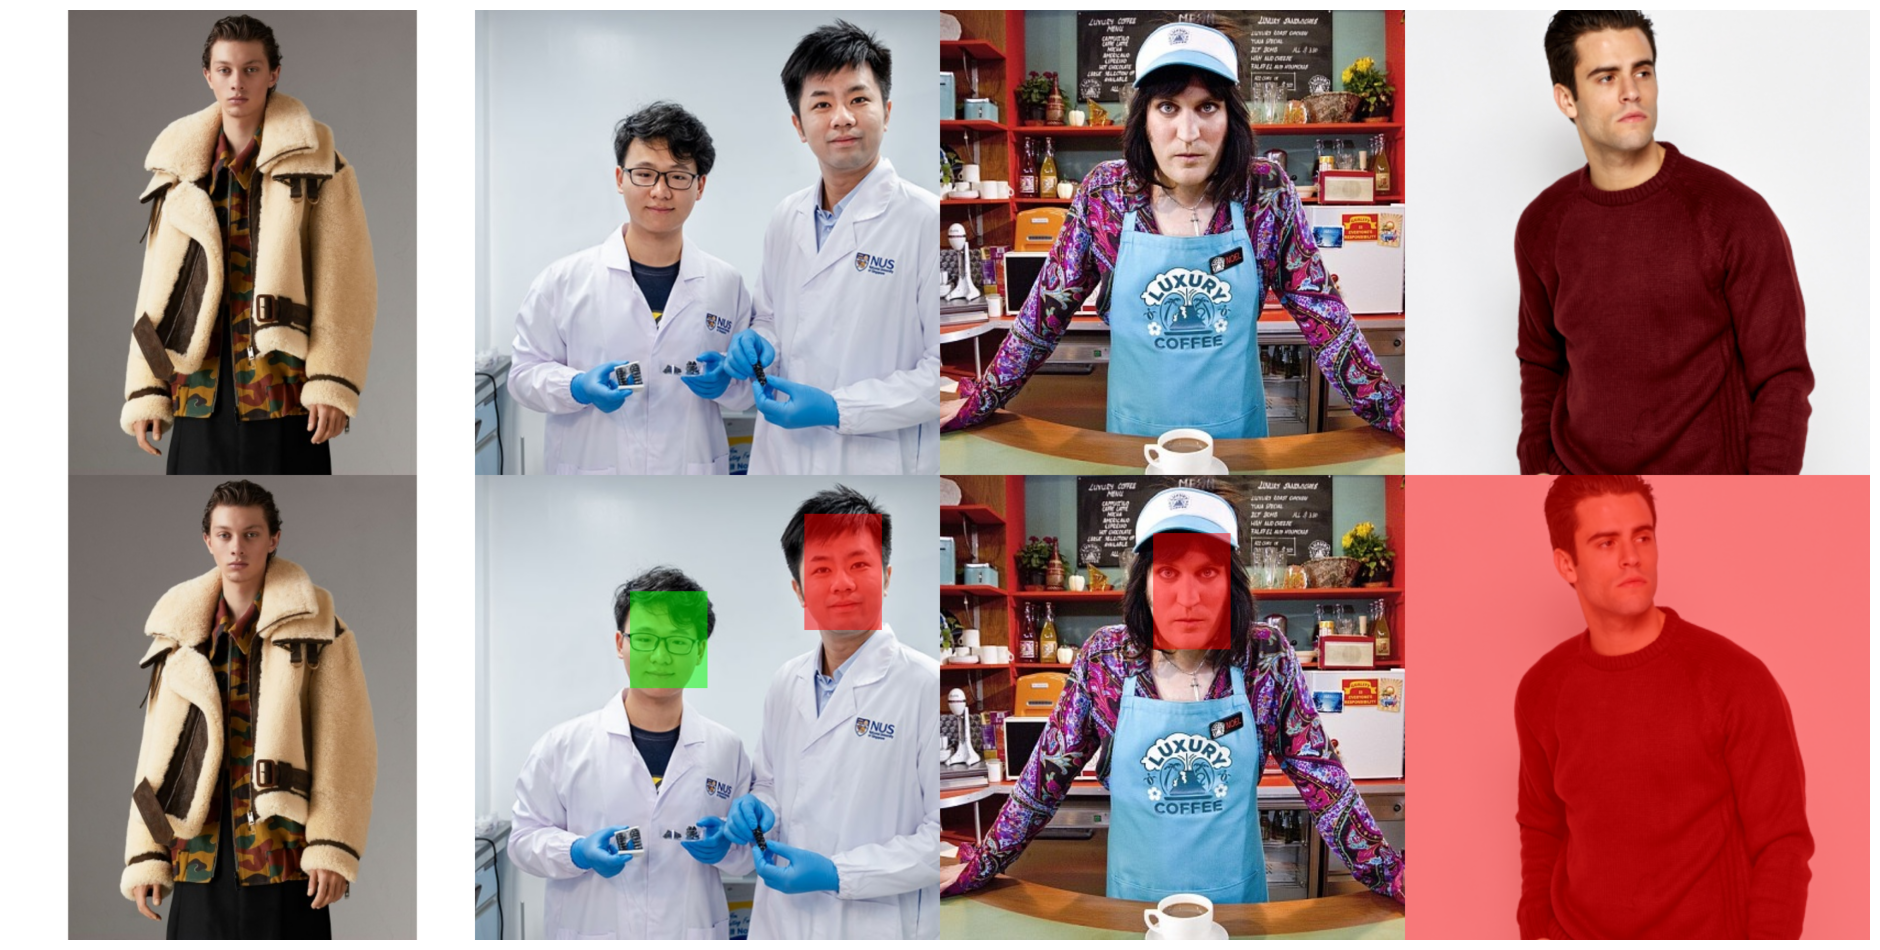

In [5]:
# PREVIEW BATCH
batch = next(data.iterator)

# Override Controlnet
cnet_override = None
# # url = "https://t3.ftcdn.net/jpg/02/96/04/04/360_F_296040417_6ANFXe238jcp5sGNPXfeF8sJ21VXJL9F.jpg" # CAT
# # url = "https://i.pinimg.com/474x/47/c1/a1/47c1a130bd0981d4543ce3083c855f84.jpg" # FACE
# # url = "https://img.freepik.com/vector-gratis/fondo-espiral-blanco-negro_1048-16005.jpg?size=626&ext=jpg&ga=GA1.1.1880011253.1699574400&semt=ais" # SPIRAL
# # url = "https://cdn.discordapp.com/attachments/1039261364935462942/1197703805400260718/Captura_de_pantalla_2024-01-19_a_las_1.47.13.png?ex=65bc3b97&is=65a9c697&hm=ea02e4dbceb5d74a594ff40ea6d1d3da0a4d7a60de311c68210df8411f46b20c&" # SWAN
# # url = "https://media.es.wired.com/photos/655dabe4eb48c3d383bdfe1f/master/pass/Sam-Altman-OpenAI-Return-Business-1258197415.jpg" # SAM ALTMAN
# # url = "https://cdn.discordapp.com/attachments/1039261364935462942/1197882045435752538/Captura_de_pantalla_2024-01-19_a_las_13.35.31.png?ex=65bce197&is=65aa6c97&hm=2d754950b98615b6e18d37b0e51fef076f4958f01e3984846a877a188b3afe80&" # ICLR
# # url = "https://i2.wp.com/zet.gallery/blog/wp-content/uploads/2016/02/Vicent-Van-Gogh-Starry-Night-Famous-Oil-Paintings-www.shairart.com_.jpg?fit=1280%2C1014"
# # url = "https://cdn.discordapp.com/attachments/1039261364935462942/1198059556048207882/asdf.jpg?ex=65bd86e9&is=65ab11e9&hm=886f0a0262b91b5ae15560566a7c50c33cbce9909ad2a3aa8174dfd0ab9e6345&" # NAPOLEON
# url = "https://cdn.discordapp.com/attachments/1198177251238363219/1198309860756963468/brad-pitt-attends-the-premiere-of-20th-century-foxs--square.jpg?ex=65be7006&is=65abfb06&hm=2c9632a1d37ad9e776dad0db96966ade519e25ad6c7dde00793b01af0f0836f6&" # BRAD PITT
# images = extras.transforms(Image.open(requests.get(url, stream=True).raw).convert("RGB")).unsqueeze(0).to(device)
# images = images.expand(batch['images'].size(0), -1, -1, -1)
# # with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.bfloat16):
# #     cnet_override = models.controlnet(1-images.mean(dim=1, keepdim=True))
# batch['images'] = images.cpu()
# # batch['images'] = nn.functional.interpolate(batch['images'], scale_factor=2, mode='nearest')

with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.bfloat16):
    cnet, cnet_input = warpcore.get_cnet(batch, models, extras)
if cnet_override is None:
    with torch.no_grad():
        if cnet_input.size(1) == 1:
            cnet_input = cnet_input.repeat(1, 3, 1, 1)
        elif cnet_input.size(1) > 3:
            cnet_input_extra_channels = cnet_input[:, 3:]     
            cnet_input = cnet_input[:, :3]     
        print(cnet_input.shape)
else:
    cnet = cnet_override
    cnet_input = 1-images.mean(dim=1, keepdim=True).cpu().expand(-1, 3, -1, -1)

plt.figure(figsize=(24, 24))
plt.axis("off")
plt.imshow(torch.cat([
    torch.cat([i for i in batch['images'].clamp(0, 1)], dim=-1),
    torch.cat([i for i in cnet_input.clamp(0, 1).cpu()], dim=-1),
], dim=-2).permute(1, 2, 0).cpu())
plt.show()

In [6]:
# plt.figure(figsize=(24, 24))
# plt.axis("off")
# plt.imshow(torch.cat([
#     torch.cat([i for i in cnet_input_extra_channels.expand(-1, 3, -1, -1).clamp(0, 1)], dim=-1),
# ], dim=-2).permute(1, 2, 0).cpu())
# plt.show()

In [7]:
# batch['captions'] = ['colorful crayon drawing by a toddler, pastel colors'] * len(batch['captions'])
# batch['captions'] = ['Pixar style animation, still frame from Pixar movie Toy Story'] * len(batch['captions'])
# batch['captions'] = ['interesting image made with play-doh'] * len(batch['captions'])
batch['captions'] = ['Oil painting'] * len(batch['captions'])
# batch['captions'] = ['oil painting of a swan by Botticelli'] * len(batch['captions'])
# batch['captions'] = ['oil painting of a dragon by Botticelli'] * len(batch['captions'])
# batch['captions'] = ['closeup photo of an android'] * len(batch['captions'])
# batch['captions'] = ['closeup photo of a greek marble sculpture wearing makeup'] * len(batch['captions'])
# batch['captions'] = ['closeup drawing of a Disney princess'] * len(batch['captions'])
# batch['captions'] = ['Play-doh figurine of a cute white cat surounded by other play-doh figures'] * len(batch['captions'])
# batch['captions'] = ['Photo of a man with facial hair'] * len(batch['captions'])
# batch['captions'] = ['still shot from Spirited Away. A warrior looking with desdain during a battle, anime flat colors'] * len(batch['captions'])


In [8]:
# PREPARE CONDITIONS
conditions = warpcore.get_conditions(batch, models, extras, is_eval=True, is_unconditional=False, eval_image_embeds=False)
unconditions = warpcore.get_conditions(batch, models, extras, is_eval=True, is_unconditional=True, eval_image_embeds=False)    


In [9]:
cnet_multiplier = 0.8 # 0.3
conditions['cnet'] = [c.clone() * cnet_multiplier if c is not None else c for c in cnet]
unconditions['cnet'] = [c.clone() * cnet_multiplier if c is not None else c for c in cnet]
print("CNet Layers:", [i for i, p in enumerate(conditions['cnet']) if p is not None])


CNet Layers: [0, 4, 8, 12, 51, 55, 59, 63]


In [10]:
# SAMPLE
# extras.sampling_configs['cfg'] = 1.5 # 5
# extras.sampling_configs['shift'] = 1
# extras.sampling_configs['timesteps'] = 20
# extras.sampling_configs['t_start'] = 1.0
print(extras.sampling_configs)

with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.bfloat16), torch.random.fork_rng():
    torch.manual_seed(42)
    
    *_, (sampled_latents, _, _) = extras.gdf.sample(
        models.generator, conditions, (4, 16, 24, 24), # (4, 16, 24, 24),
        unconditions, device=device, **extras.sampling_configs
    )
    sampled = models.previewer(sampled_latents).float()
    print(sampled_latents.shape, sampled.shape)
    
    effnet_latents = warpcore.encode_latents(batch, models, extras)
    decoded = models.previewer(effnet_latents).float()

{'cfg': 5, 'sampler': <gdf.samplers.DDPMSampler object at 0x7f5ba3e0f160>, 'shift': 1, 'timesteps': 20}


/fsx/home-warp/env2/lib/python3.8/site-packages/torch/random.py:151: UserWarning: CUDA reports that you have 8 available devices, and you have used fork_rng without explicitly specifying which devices are being used. For safety, we initialize *every* CUDA device by default, which can be quite slow if you have a lot of CUDAs. If you know that you are only making use of a few CUDA devices, set the environment variable CUDA_VISIBLE_DEVICES or the 'devices' keyword argument of fork_rng with the set of devices you are actually using. For example, if you are using CPU only, set device.upper()_VISIBLE_DEVICES= or devices=[]; if you are using device 0 only, set CUDA_VISIBLE_DEVICES=0 or devices=[0].  To initialize all devices and suppress this warning, set the 'devices' keyword argument to `range(torch.cuda.device_count())`.
  warnings.warn(message)


torch.Size([4, 16, 24, 24]) torch.Size([4, 3, 192, 192])


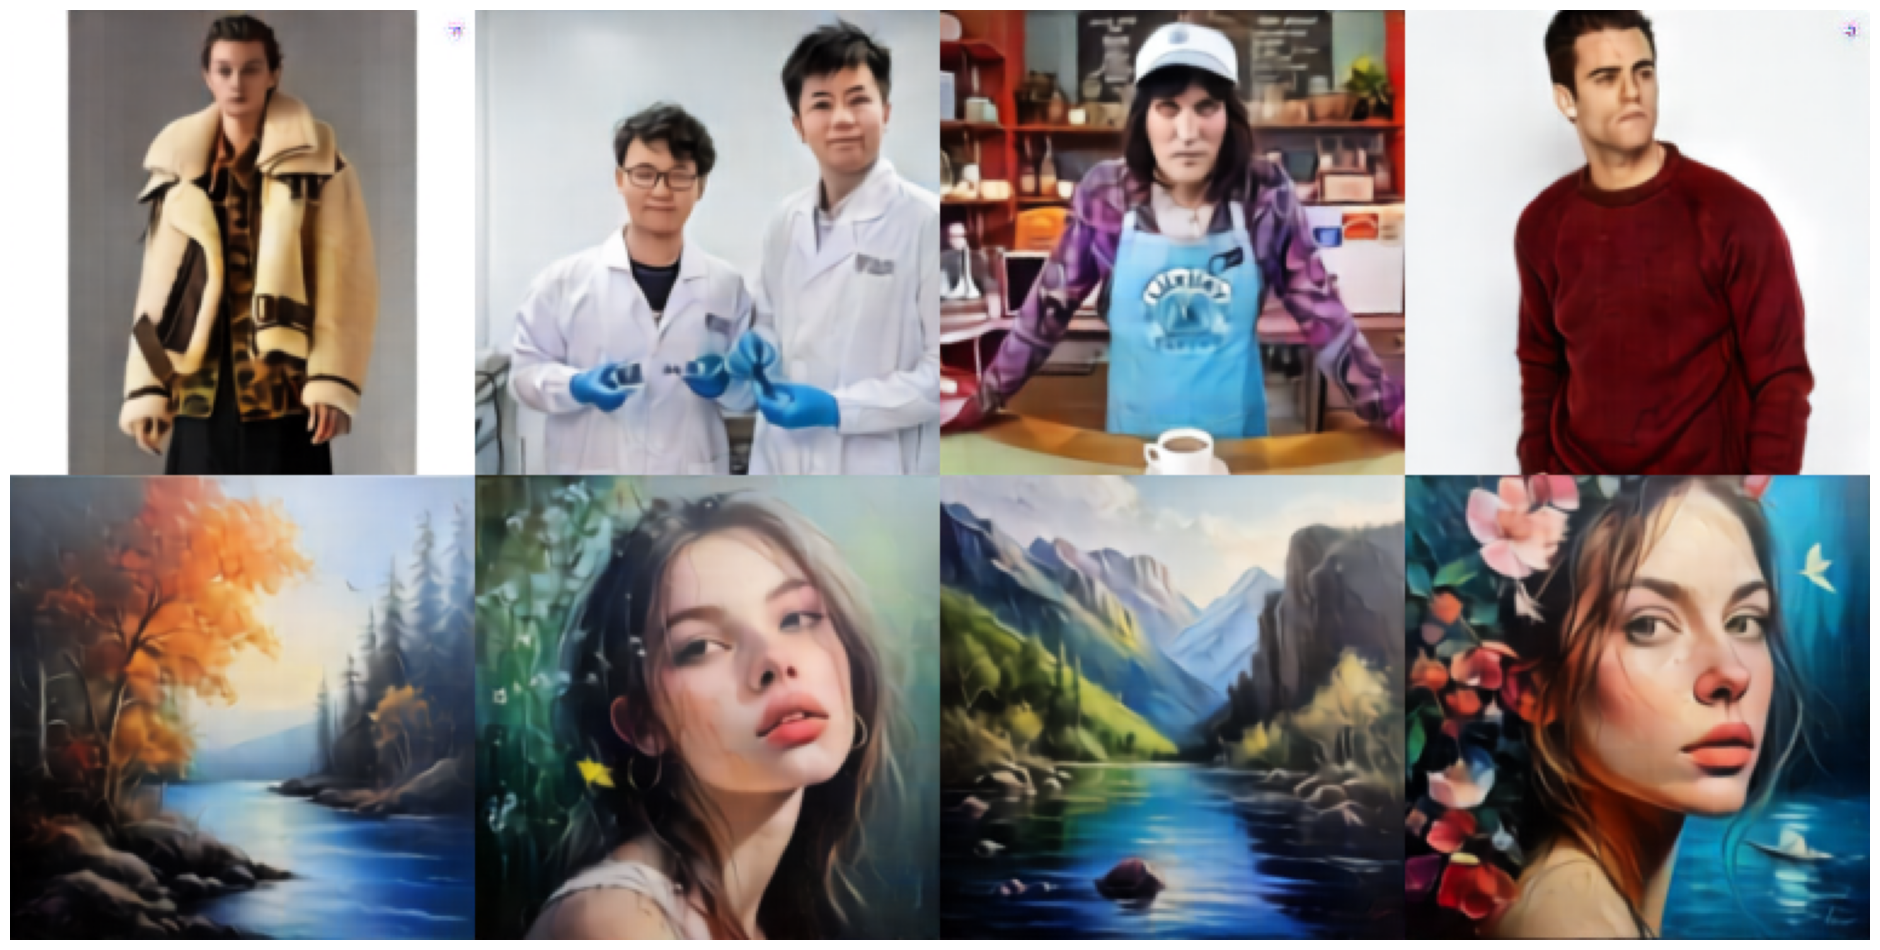

In [11]:
# VISUALIZE SAMPLES
# merged = decoded.clone()
# merged[:, :, :, 96:] = sampled[:, :, :, 96:]

plt.figure(figsize=(24, 24))
plt.axis("off")
plt.imshow(torch.cat([
    torch.cat([i for i in decoded.cpu().clamp(0, 1)], dim=-1),
    torch.cat([i for i in sampled.cpu().clamp(0, 1)], dim=-1),
#     torch.cat([i for i in merged.cpu().clamp(0, 1)], dim=-1),
], dim=-2).permute(1, 2, 0).cpu())
plt.show()

In [12]:
# STAGE B SAMPLING
conditions_b = warpcore_b.get_conditions(batch, models_b, extras_b, is_eval=True, is_unconditional=False, eval_image_embeds=False)
unconditions_b = warpcore_b.get_conditions(batch, models_b, extras_b, is_eval=True, is_unconditional=True, eval_image_embeds=False)
conditions_b['effnet'] = sampled_latents


In [13]:
# SAMPLE
# extras_b.sampling_configs['cfg'] = 1.5
# extras_b.sampling_configs['shift'] = 1
# extras_b.sampling_configs['timesteps'] = 10
# extras_b.sampling_configs['t_start'] = 1.0
print(extras_b.sampling_configs)

with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.bfloat16), torch.random.fork_rng():
    torch.manual_seed(42)
    
    *_, (sampled_latents_b, _, _) = extras_b.gdf.sample(
        models_b.generator, conditions_b, (4, 4, 256, 256), # (4, 4, 256, 256),
        unconditions_b, device=device, **extras_b.sampling_configs
    )
    sampled_b = models_b.stage_a.decode(sampled_latents_b).float()
    print(sampled_latents.shape, sampled_b.shape)

{'cfg': 1.5, 'sampler': <gdf.samplers.DDPMSampler object at 0x7f5b9066acd0>, 'shift': 1, 'timesteps': 10}
torch.Size([4, 16, 24, 24]) torch.Size([4, 3, 1024, 1024])


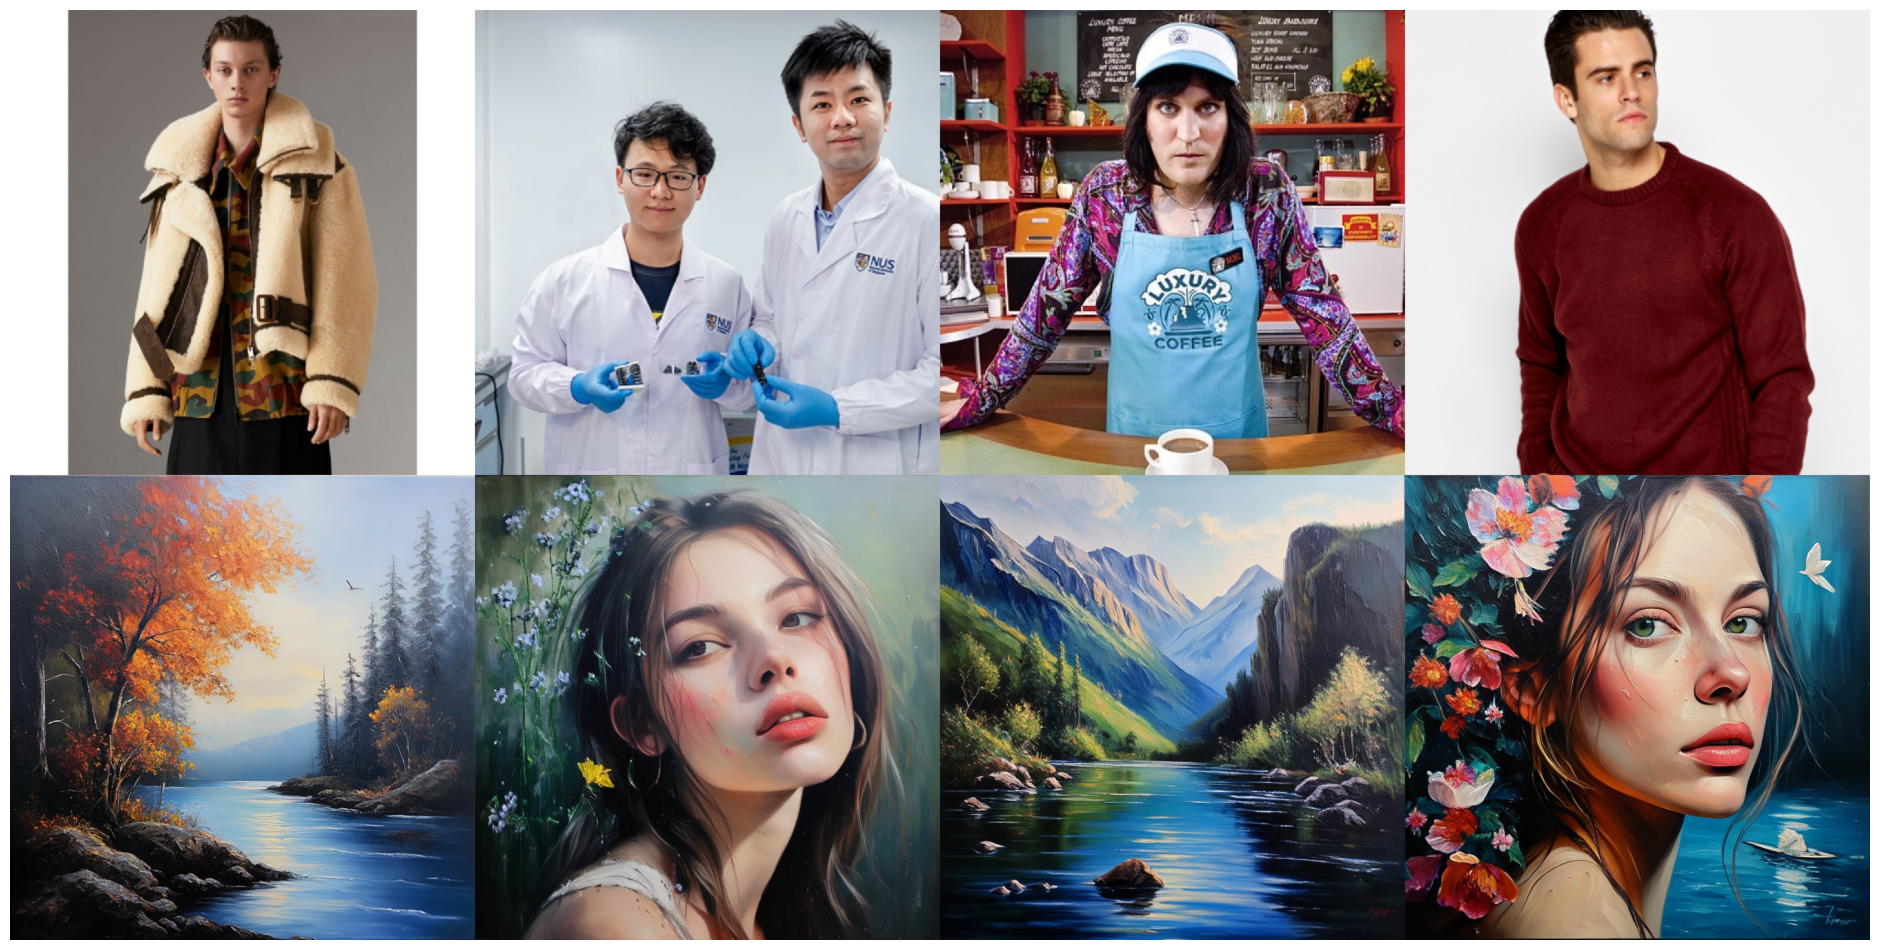

In [14]:
plt.figure(figsize=(24, 24))
plt.axis("off")
plt.imshow(torch.cat([
    torch.cat([i for i in nn.functional.interpolate(batch['images'], size=sampled_b.shape[-2:]).cpu().clamp(0, 1)], dim=-1),
    torch.cat([i for i in sampled_b.cpu().clamp(0, 1)], dim=-1),
], dim=-2).permute(1, 2, 0).cpu())
plt.show()

torchvision.utils.save_image(torch.cat([
    torch.cat([i for i in nn.functional.interpolate(batch['images'], size=sampled_b.shape[-2:]).cpu().clamp(0, 1)], dim=-1),
    torch.cat([i for i in sampled_b.cpu().clamp(0, 1)], dim=-1),
], dim=-2), f'controlnet_sample.jpg')